# Data Analyst Professional Practical Exam Submission

In [11]:
# import statements
# data frame manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical analysis
from scipy import stats

# helper functions and cleaning for specific dataset
import dcdap_clean as clean
import dcdap_functions as dc

#settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

try:
    clean.main()
except Exception as e:
    print('Error: clean.main()')
    print(e)

df = pd.read_csv('product_sales_cleaned.csv')

## Sales Strategy

This report is being provided to the sales team to discuss the following:

<ul>
<li>How many customers were there for each approach?</li>
<li>What does the spread of the revenue look like overall? And for each method?</li>
<li>Was there any difference in revenue over time for each of the methods?</li>
<li>Based on the data, which method would you recommend we continue to use? Some of these methods take more time from the team so they may not be the best for us to use if the results are similar</li></ul>

### Customers by approach

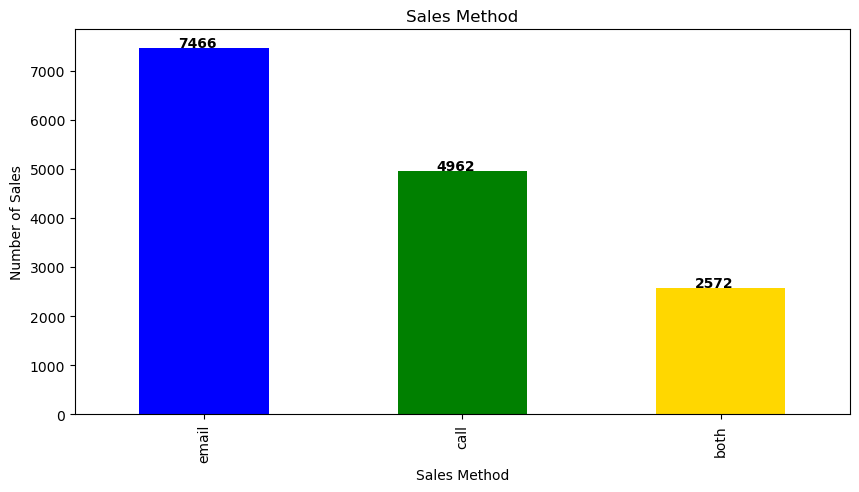

In [12]:
dc.customers_by_method(df)

Of our 15,000 customers, most are being reached out to by email. A little less than a third of our customers are being reached out to by phone. The rest are being reached out to by both methods for a sale.

### Spread of revenue overall

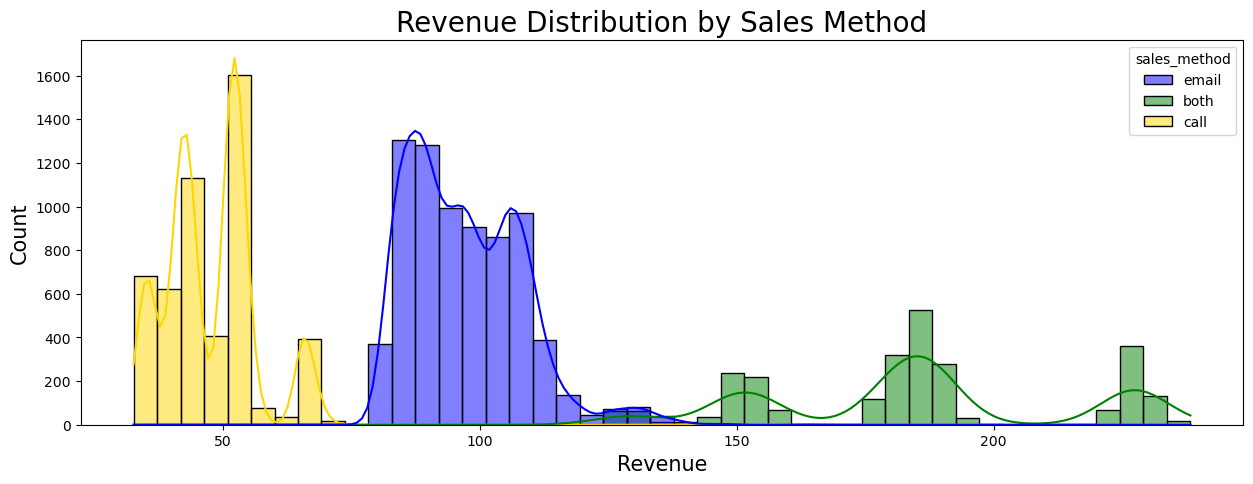

In [13]:
dc.sales_distribution_hist(df)

#### Individual Distribution Plots

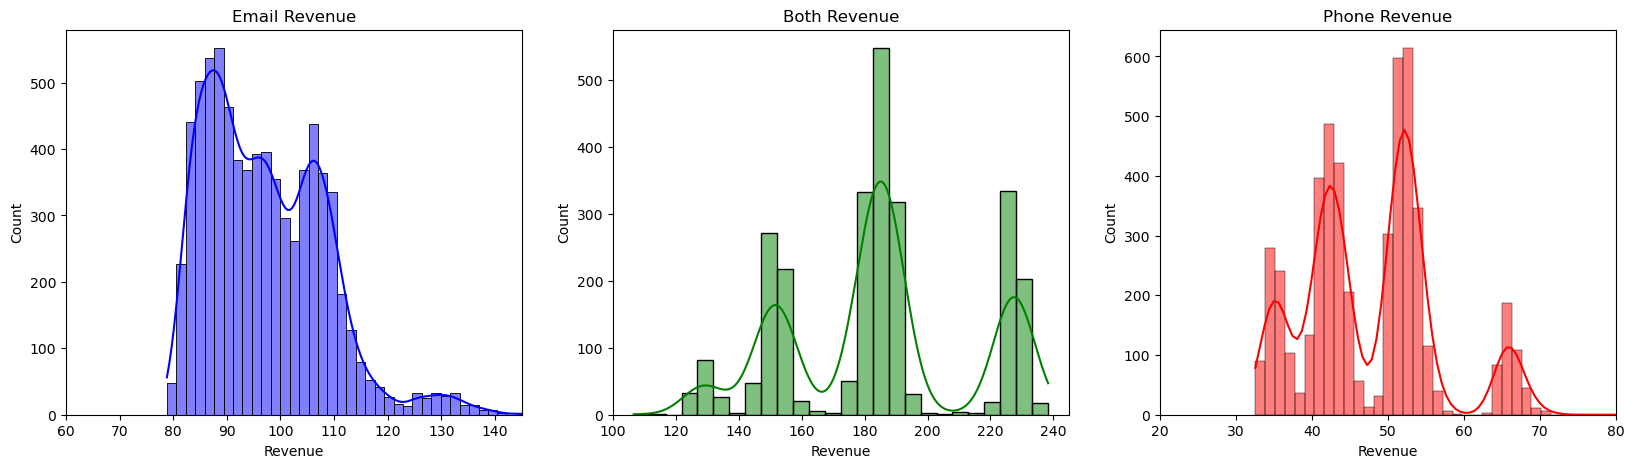

In [14]:
dc.individual_method_rev(df)

Unexpectedly, it seems that each of the methods has a different and non-overalapping distribution. This is a good sign that the strategy used depends on the type of deal being made. Unfortuntely, we do not have any data on deals that have been lost, so we cannot compare the distributions of deals that were won vs. lost to determine the actual effectiveness of each method compared to lost deals.

### Difference over time

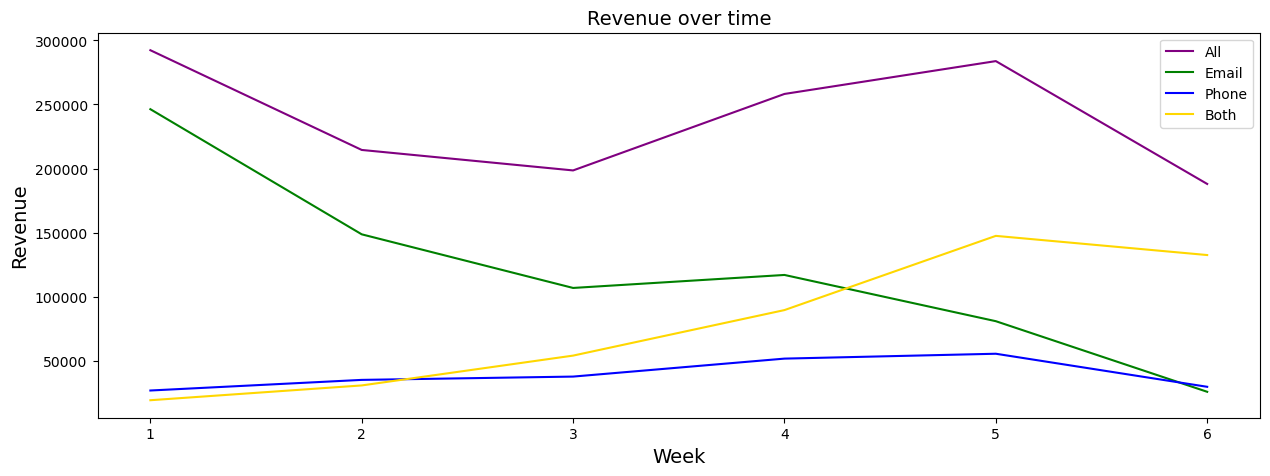

In [15]:
dc.revenue_over_time(df)

Over time, the combined method is pulling in more revenue than the individual method. There could be many underlying factors for this such as:

- The combined method is more effective at converting customers over time
- The combined method is better at closing larger deals
- The combined method is better at upselling customers
- The combined method is better at retaining customers

Many of the above factors are difficult to measure without data from lost deals. However, we can look at the average deal size for each method to see if there is a difference. Below an ANOVA test will be ran to tell us if the groups have any meaningful differences.

In [16]:
# anova test
f, p = dc.revenue_method_anova(df)
print('F-value:', f)
print('P-value:', p)
if p < 0.05:
    print('Reject null hypothesis, there is a significant difference in revenue by sales method.')

F-value: 68238.4267977537
P-value: 0.0
Reject null hypothesis, there is a significant difference in revenue by sales method.


In [17]:
dc.revenue_method_tukey(df)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
  both   call -136.4676   0.0 -137.3339 -135.6013   True
  both  email  -86.9457   0.0  -87.7609  -86.1305   True
  call  email   49.5219   0.0   48.8689    50.175   True
--------------------------------------------------------


## Final Results

Using both email and calls seems to be the best approach moving forward. While it was only  used on about a third of deals, it yielded significantly higher deal values. A further analysis on deals lost would be useful to see if this assumption is correct.

The email model can still be used to target smaller deals and the call only model for moderate deals. Time to prep each model was not given to deliver an EMV per deal type. This would be useful to see if the time spent on each model is worth the return.

Attached to this report is the code used to generate the results. The code is written in Python and uses the Pandas library for data manipulation and the Matplotlib library for data visualization. Also, a cleaning function and visualization function were created to help with the analysis.S